In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [2]:
interpreter = tf.lite.Interpreter(model_path="primero.tflite")
interpreter.allocate_tensors()

output = interpreter.get_output_details()[0]  

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
# Set input tensor data30
# tf.lite.Interpreter(
#     model_path="/Users/josebenvenuto/Desktop/LARC-2023/Vision/primero.tflite",
#     model_content=None,
#     experimental_delegates=None,
#     num_threads=None,
#     experimental_op_resolver_type=tf.lite.experimental.OpResolverType.AUTO,
#     experimental_preserve_all_tensors=False
# )
input = interpreter.get_input_details()[0]
input_data = tf.constant(1., shape=[1, 1])



Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



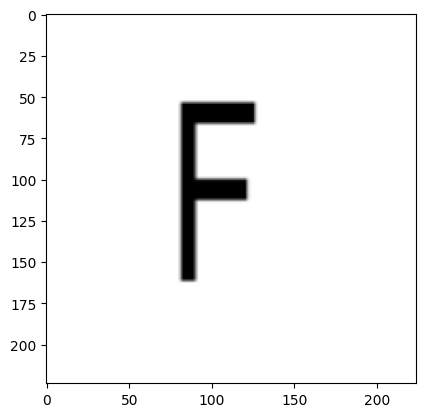

In [4]:
image = "F.png"
image = cv2.imread(image, cv2.IMREAD_UNCHANGED)
shape = interpreter.get_input_details()[0]['shape']
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = np.asanyarray(image, dtype="uint8")
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) 
image = cv2.resize(image, (shape[1], shape[2])) 

plt.imshow(image)
image = image.reshape(shape)
interpreter.set_tensor(input['index'], image)
interpreter.invoke()


In [5]:
# output_details = interpreter.get_output_details()

# output_index = None
# for i, detail in enumerate(output_details):
#     if detail['name'] == 'output_tensor_name':
#         output_index = i
#         break

# if output_index is None:
#     print('Output tensor not found')
#print(interpreter.get_tensor(output['index'])[0])
val = (interpreter.get_tensor(output['index'])[0])
acum = 0
max = 0
if val[8]-20>0:
    val[8] = val[8]-20
    
for i in range(len(val)):
    acum += val[i]
    if val[max] < val[i]:
        max = i

data = ['A', 'B', 'C', 'D','E', 'F', ' G', 'H','I']

print(val)
print(data[max])

[  2   2   6   3   8 110   1  11  94]
F
